### 1. Imports

In [1]:
# Import libraries
import warnings
warnings.filterwarnings("ignore")
import gym
import numpy as np
#from stable_baselines.common.policies import MlpPolicy
from stable_baselines3 import PPO
from matplotlib import pyplot as plt

In [2]:
# Import classes
from rl_environment import Environment

### Environment creation

In [3]:
# Parameters
number_of_regional_warehouses = 2
max_inventory_amount_regional_warehouses = 40
max_inventory_amount_central_warehouse = 100
customer_demand_per_step = [1,2]  # List needs one entry per regional warehouse 
simulation_length = 30
lead_time = 2
shipment_amount = 5

In [4]:
env = Environment(number_of_regional_wh = number_of_regional_warehouses, 
                  rw_inventory_limit = max_inventory_amount_regional_warehouses, 
                  cw_inventory_limit = max_inventory_amount_central_warehouse,
                  demand = customer_demand_per_step,
                  sim_length = simulation_length,
                  lead_time = lead_time,
                  shipment_amount = shipment_amount)

env.print_environment_information()

Simulation created with the following parameters:
________________________________________________________________________________
Simulation | Round 1
-------------------
-> Active shipments:
No active shipments

-> Warehouses:
central_warehouse ; Inventory: 33
regional_warehouse_1 ; ID: 1 ; Inventory: 13 ; Demand: 1 ; Lost sales: 0
regional_warehouse_2 ; ID: 2 ; Inventory: 13 ; Demand: 2 ; Lost sales: 0
________________________________________________________________________________
Environment Information
-----------------------
Observation space: Dict(cw_inventory:Discrete(101), rw_inventories:MultiDiscrete([41 41]))
Action space: MultiDiscrete([2 2])
Starting state: {'rw_inventories': array([13, 13]), 'cw_inventory': 33}
________________________________________________________________________________


### RL model training

###### Model 1: PPO
Proximal Policy Optimization
https://openai.com/blog/openai-baselines-ppo/

In [5]:
ppo_model = PPO("MultiInputPolicy", env, verbose=1)
ppo_model.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 30       |
|    ep_rew_mean     | 1.69     |
| time/              |          |
|    fps             | 1059     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mean          | 30         |
|    ep_rew_mean          | 1.74       |
| time/                   |            |
|    fps                  | 741        |
|    iterations           | 2          |
|    time_elapsed         | 5          |
|    total_timesteps      | 4096       |
| train/                  |            |
|    approx_kl            | 0.00854534 |
|    clip_fraction        | 0.0396     |
|    clip_range           | 0.2        |
|    entropy_loss         | -1.38

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 4.23        |
| time/                   |             |
|    fps                  | 629         |
|    iterations           | 11          |
|    time_elapsed         | 35          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.008147532 |
|    clip_fraction        | 0.0798      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.842      |
|    explained_variance   | 0.231       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.497       |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.0105     |
|    value_loss           | 1           |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 5.65        |
| time/                   |             |
|    fps                  | 612         |
|    iterations           | 21          |
|    time_elapsed         | 70          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.006961762 |
|    clip_fraction        | 0.0803      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.534      |
|    explained_variance   | 0.263       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.981       |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00892    |
|    value_loss           | 1.42        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30          |
|    ep_rew_mean          | 7.44        |
| time/                   |             |
|    fps                  | 583         |
|    iterations           | 31          |
|    time_elapsed         | 108         |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.005152474 |
|    clip_fraction        | 0.0597      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.354      |
|    explained_variance   | 0.322       |
|    learning_rate        | 0.0003      |
|    loss                 | 0.927       |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00769    |
|    value_loss           | 2.25        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 30    

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 30           |
|    ep_rew_mean          | 8.18         |
| time/                   |              |
|    fps                  | 580          |
|    iterations           | 41           |
|    time_elapsed         | 144          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0038493522 |
|    clip_fraction        | 0.0388       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.223       |
|    explained_variance   | 0.434        |
|    learning_rate        | 0.0003       |
|    loss                 | 1.21         |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00461     |
|    value_loss           | 2.52         |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

###### Learning Curve

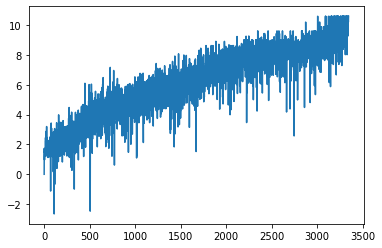

In [6]:
plt.plot(env.total_reward)
plt.show()

### Run simulation

In [9]:
# Reset environment for simulation
state = env.reset()
done = False

# Graph data
inventory_levels = {}
for rw_id in env.simulation.get_regional_warehouses():
    inventory_levels[rw_id] = []

# Run simulation with model
while not done:
    action, _states = ppo_model.predict(state)
    state, reward, done, info = env.step(action)
    
    # For Graph
    i = 1
    for inv in info["Inventory:"]["rw_inventories"]:
        inventory_levels[i].append(inv)
        i += 1
    
    # print(env.simulation.print_state())
    for i in info:
        print(i, info[i], end=" | ")
    print()
    
print("\n", env.evaluation_parameters())

Steps left: 29 | Inventory: {'rw_inventories': array([12, 11]), 'cw_inventory': 33} | Action: [0 0] | Reward: 0.08 | 
Steps left: 28 | Inventory: {'rw_inventories': array([11,  9]), 'cw_inventory': 33} | Action: [0 0] | Reward: 0.09 | 
Steps left: 27 | Inventory: {'rw_inventories': array([10,  7]), 'cw_inventory': 33} | Action: [0 0] | Reward: 0.11 | 
Steps left: 26 | Inventory: {'rw_inventories': array([9, 5]), 'cw_inventory': 33} | Action: [0 0] | Reward: 0.13 | 
Steps left: 25 | Inventory: {'rw_inventories': array([8, 3]), 'cw_inventory': 33} | Action: [0 1] | Reward: 0.18 | 
Steps left: 24 | Inventory: {'rw_inventories': array([7, 1]), 'cw_inventory': 33} | Action: [0 0] | Reward: 0.31 | 
Steps left: 23 | Inventory: {'rw_inventories': array([6, 4]), 'cw_inventory': 33} | Action: [0 0] | Reward: 0.17 | 
Steps left: 22 | Inventory: {'rw_inventories': array([5, 2]), 'cw_inventory': 33} | Action: [0 1] | Reward: 0.25 | 
Steps left: 21 | Inventory: {'rw_inventories': array([4, 0]), 'cw_

###### Inventory level graph

Regional warehouse 1


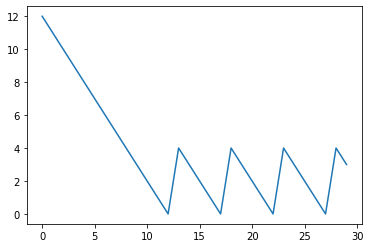

Regional warehouse 2


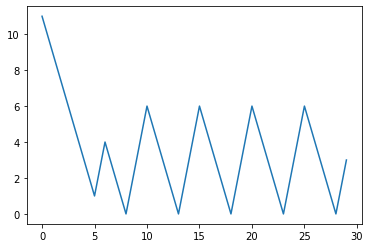

In [8]:
for rw_id in inventory_levels:
    print("Regional warehouse", rw_id)
    plt.plot(inventory_levels[rw_id])
    plt.show()